In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

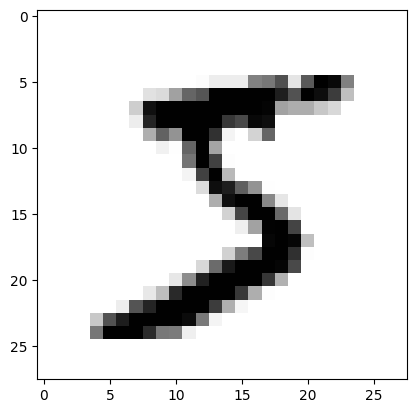

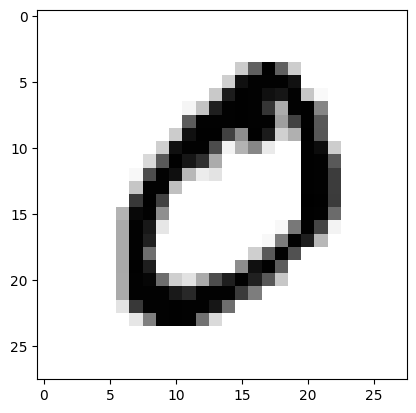

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(2):
    plt.imshow(x_train[i],cmap='binary')
    plt.show()

In [4]:
# converting 1 to [0,1,0,0,0,0,0,0,0]
# converting 1 to [0,0,0,0,0,0,7,0,0]

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [5]:
print(y_train_encoded.shape,y_test_encoded.shape)

(60000, 10) (10000, 10)


In [6]:
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

# Normalise Data

In [7]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
print(x_mean,x_std)

33.318421449829934 78.56748998339798


In [8]:
epsilon = 1e-10
x_train_normalised = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_normalised = (x_test_reshaped - x_mean)/(x_std + epsilon)

# Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    
])

In [10]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training

In [11]:
model.fit(x_train_normalised,y_train_encoded,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 2s 939us/step - loss: 0.3642 - accuracy: 0.8943
Epoch 2/3
1875/1875 [==============================] - 2s 905us/step - loss: 0.1804 - accuracy: 0.9467
Epoch 3/3
1875/1875 [==============================] - 2s 956us/step - loss: 0.1372 - accuracy: 0.9603


# Predictions

In [12]:
loss,accuracy = model.evaluate(x_test_normalised,y_test_encoded)

313/313 [==============================] - 0s 721us/step - loss: 0.1304 - accuracy: 0.9613


313/313 [==============================] - 0s 658us/step


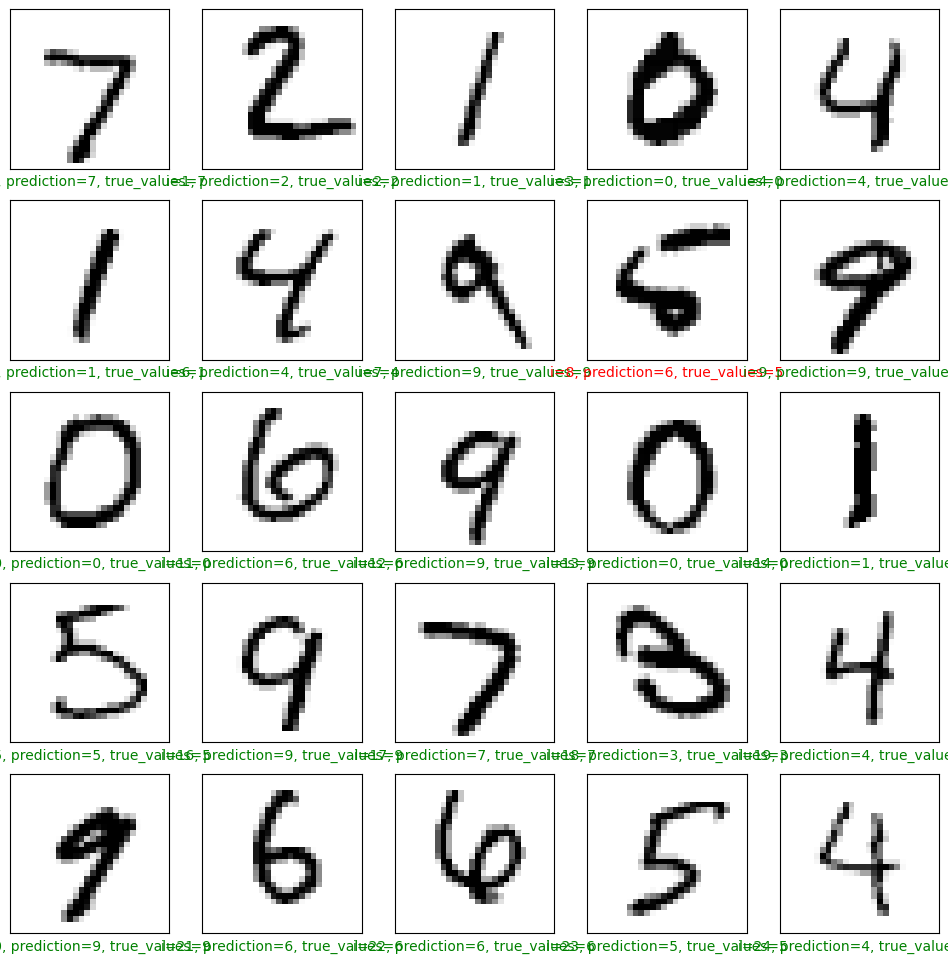

In [13]:
predictions = model.predict(x_test_normalised)

plt.figure(figsize=(12,12))
start_idx=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(predictions[start_idx+i])
    true_values = y_test[start_idx+i]
    
    color='g'
    if prediction!=true_values:
        color='r'
    
    plt.xlabel('i={}, prediction={}, true_values={}'.format(start_idx+i,prediction,true_values),color=color)
    plt.imshow(x_test[start_idx+i],cmap='binary')
plt.show()
    
    